In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

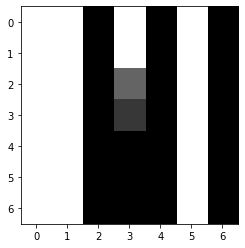

In [7]:
img = np.asarray(
    [
        [255, 255, 0, 255, 0, 255, 0],
        [255, 255, 0, 255, 0, 255, 0],
        [255, 255, 0, 100, 0, 255, 0],
        [255, 255, 0, 55, 0, 255, 0],
        [255, 255, 0, 0, 0, 255, 0],
        [255, 255, 0, 0, 0, 255, 0],
        [255, 255, 0, 0, 0, 255, 0],
    ]
)

plt.imshow(img, cmap='gray')

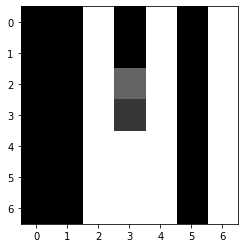

In [8]:
img2 = img.copy()

img2[img==0] = 255
img2[img==255] = 0

plt.imshow(img2, cmap='gray')

In [16]:
import cv2
import requests 

dog = "https://static.wixstatic.com/media/2cd43b_ad23f564a47043fbb05fd123ecf4eb8f~mv2.png/v1/fill/w_320,h_320,q_90/2cd43b_ad23f564a47043fbb05fd123ecf4eb8f~mv2.png"

img_data = requests.get(url=dog).content

with open('dog.png', 'wb') as handler:
    handler.write(img_data)

In [17]:
dog_img = cv2.imread('dog.png')

In [18]:
dog_img_rgb = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
dog_img_gray = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)

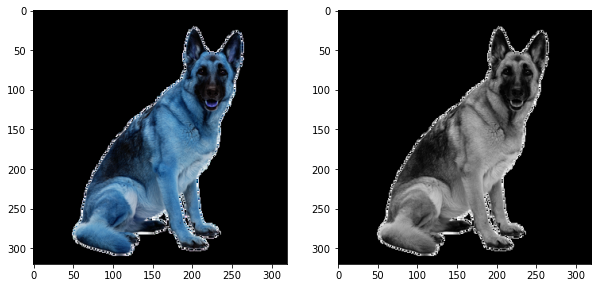

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(dog_img)
ax[1].imshow(dog_img_gray, cmap='gray')

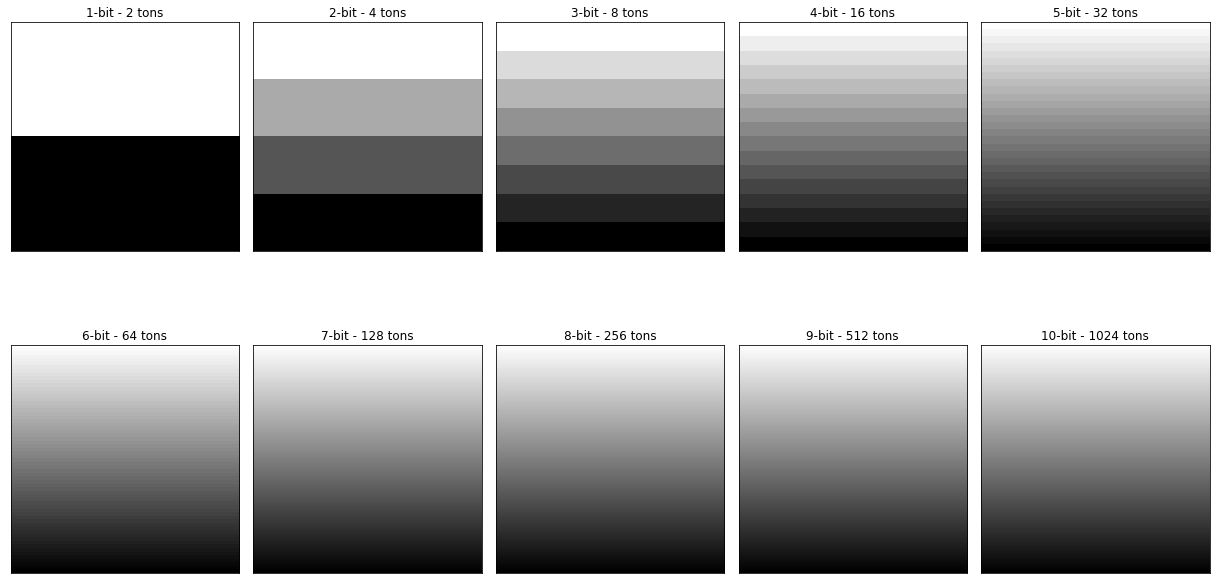

In [20]:
gradientes={}

for bit in range(1,11):

    gradiente =  np.linspace(0, 1, 2**bit)[::-1]

    gradiente = np.vstack([gradiente for _ in range(2**bit)])

    gradientes[f"{bit}"] = gradiente.T

f, ax = plt.subplots(2, 5, figsize=(17,10))

row = 0

col = 0

for i, (key, gradiente) in enumerate(gradientes.items()):
    if i == 5:
        row = 1
        col = 0
    ax[row][col].imshow(gradiente, cmap='gray')

    ax[row][col].title.set_text(f'{key}-bit - {2**(int(key))} tons')

    ax[row][col].get_xaxis().set_visible(False)
    ax[row][col].get_yaxis().set_visible(False)
    col += 1

f.tight_layout()

In [21]:
!pip install mlxtend

In [23]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import random
import tensorflow.keras

In [24]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [25]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
print(X_train.shape, y_train.shape, "\n")
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) 

(10000, 28, 28) (10000,)


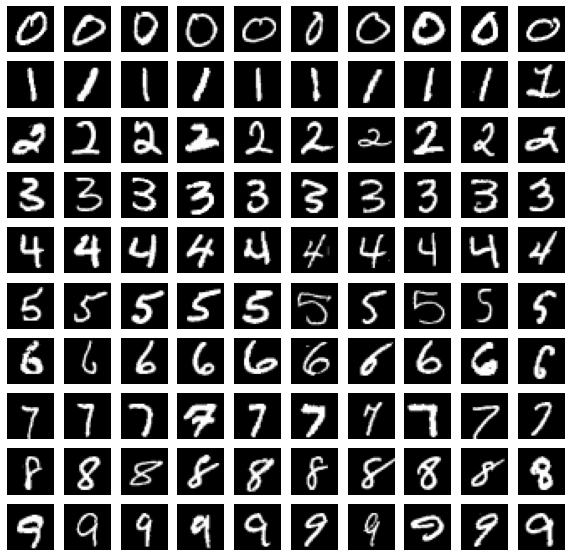

In [31]:
f,ax = plt.subplots(10, 10, figsize=(10, 10))

for i, class_name in enumerate(class_names):
    idxs = np.argwhere(y_train ==i)
    idxs = random.choices(idxs, k=10)
    for n in range(0, 10):
        idx = idxs[n][0]
        features = X_train[idx]
        target = y_train[idx]
        img = features.reshape(28, 28)
        ax[i][n].imshow(img, cmap='gray')
        ax[i, n].axis('off')
        
plt.axis('off')
plt.show()

In [33]:
X_train_rd = X_train.reshape(60000, -1)
X_test_rd = X_test.reshape(10000, -1)

print(X_train_rd.shape)
print(X_test_rd.shape, "\n")

(60000, 784)
(10000, 784) 



In [35]:
rf = RandomForestClassifier()

rf.fit(X_train_rd, y_train)

y_pred = rf.predict(X_test_rd)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



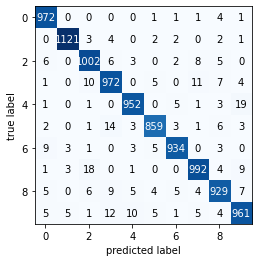

In [41]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

# horizontal = Labels preditas
# Vertical = Labels verdadeiras

In [42]:
# Função para plotar a imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

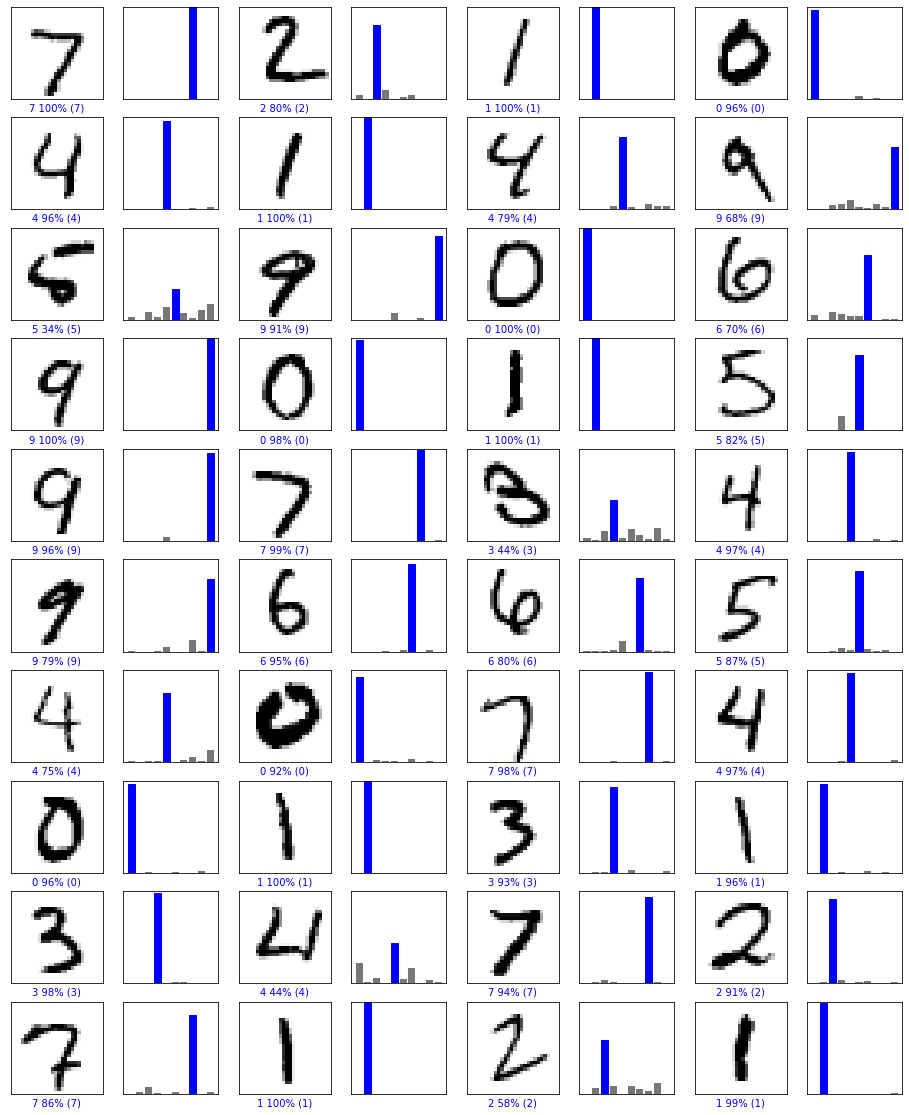

In [45]:
y_prob_rf = rf.predict_proba(X_test_rd)

n_rows = 10
n_cols = 4
n_images = n_rows * n_cols

plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(n_images):
    plt.subplot(n_rows, 2*n_cols, 2 * i + 1)
    plot_image(i, y_prob_rf, y_test, X_test)
    plt.subplot(n_rows, 2*n_cols, 2 * i + 2)
    plot_value_array(i, y_prob_rf, y_test)

plt.show()

## Redeus Neurais

In [46]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)

print(X_train_cnn.shape)

(60000, 28, 28, 1)


In [47]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print(X_test_cnn.shape)

(10000, 28, 28, 1)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, MaxPooling2D

In [55]:
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='Conv2D'),
    MaxPool2D((2, 2), name='Max_Pool'),
    Flatten(name='Flatten'),
    Dense(100, activation='relu', name='Dense_it'),
    Dense(10, activation='softmax', name="Output_layer")
])

In [57]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 Max_Pool (MaxPooling2D)     (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 Dense_it (Dense)            (None, 100)               540900    
                                                                 
 Output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [59]:
cnn.fit(X_train_cnn, y_train, epochs=5)

y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=-1)

y_pred_cnn

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1620 - accuracy: 0.9510
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0569 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 5/5
313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.96      0.97       974
           9       0.96      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



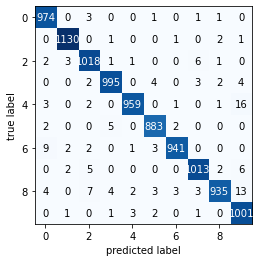

In [61]:
cm = confusion_matrix(y_test, y_pred_cnn)

plot_confusion_matrix(conf_mat=cm)
plt.show()

# horizontal = Labels preditas
# Vertical = Labels verdadeiras